In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_taxi = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/GitHub/projeto-sprint7/datasets/moved_project_sql_result_01.csv")
df_bairros = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/GitHub/projeto-sprint7/datasets/moved_project_sql_result_04.csv")
df_viagens = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/GitHub/projeto-sprint7/datasets/moved_project_sql_result_07.csv")

In [12]:
# Visualizando os primeiros dados
print(df_taxi.head())
print(df_bairros.head())
print(df_viagens.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [13]:
# Verificando tipos de dados
df_taxi.info()
df_bairros.info()
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

In [14]:
# Top 10 bairros por número de viagens
top_bairros = df_bairros.sort_values(by='average_trips', ascending=False).head(10)
print(top_bairros)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


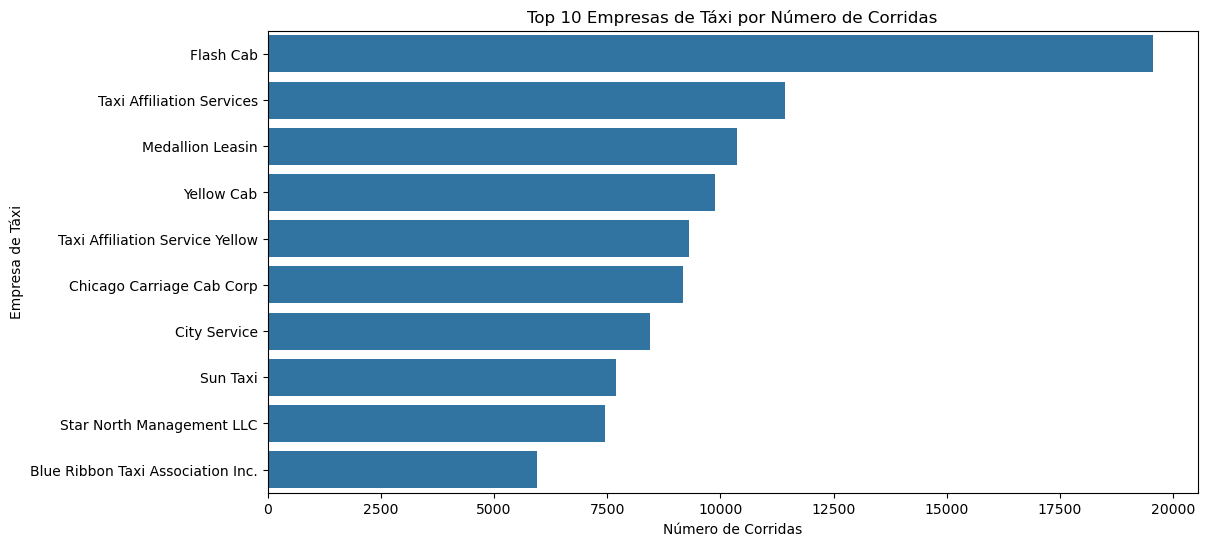

In [15]:
# Gráfico: Top 10 Empresas de táxi e número de corridas
top_10_taxi = df_taxi.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_taxi['trips_amount'], y=top_10_taxi['company_name'], order=top_10_taxi['company_name'])
plt.xlabel("Número de Corridas")
plt.ylabel("Empresa de Táxi")
plt.title("Top 10 Empresas de Táxi por Número de Corridas")
plt.show()

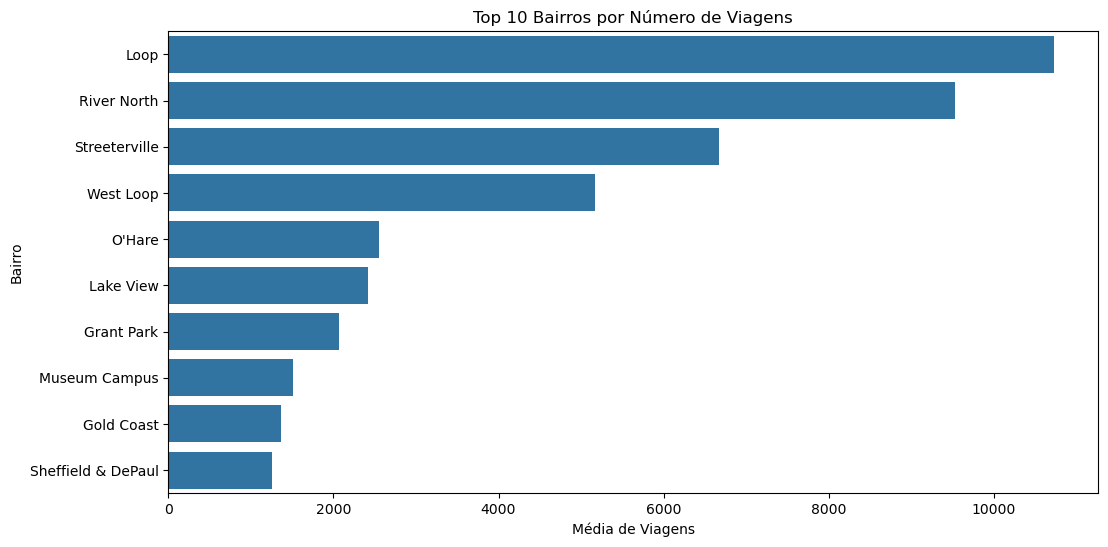

In [16]:
# Gráfico: Top 10 bairros por número de viagens
plt.figure(figsize=(12,6))
sns.barplot(x=top_bairros['average_trips'], y=top_bairros['dropoff_location_name'])
plt.xlabel("Média de Viagens")
plt.ylabel("Bairro")
plt.title("Top 10 Bairros por Número de Viagens")
plt.show()

In [17]:
# Teste de hipótese
alpha = 0.05  # Definindo nível de significância
# Convertendo data e hora

df_viagens['start_ts'] = pd.to_datetime(df_viagens['start_ts'])

# Filtrando viagens aos sábados com chuva
df_viagens['day_of_week'] = df_viagens['start_ts'].dt.day_name()
saturday_rainy = df_viagens[(df_viagens['day_of_week'] == 'Saturday') & (df_viagens['weather_conditions'] == 'Bad')]
saturday_non_rainy = df_viagens[(df_viagens['day_of_week'] == 'Saturday') & (df_viagens['weather_conditions'] != 'Bad')]

print(saturday_non_rainy)
print(saturday_rainy)




                start_ts weather_conditions  duration_seconds day_of_week
0    2017-11-25 16:00:00               Good            2410.0    Saturday
1    2017-11-25 14:00:00               Good            1920.0    Saturday
2    2017-11-25 12:00:00               Good            1543.0    Saturday
3    2017-11-04 10:00:00               Good            2512.0    Saturday
4    2017-11-11 07:00:00               Good            1440.0    Saturday
...                  ...                ...               ...         ...
1062 2017-11-11 06:00:00               Good            1500.0    Saturday
1063 2017-11-25 11:00:00               Good               0.0    Saturday
1064 2017-11-11 10:00:00               Good            1318.0    Saturday
1065 2017-11-11 13:00:00               Good            2100.0    Saturday
1066 2017-11-11 08:00:00               Good            1380.0    Saturday

[888 rows x 4 columns]
                start_ts weather_conditions  duration_seconds day_of_week
6    2017-11-0

In [19]:
# Filtrando viagens aos domingos com chuva
df_viagens['day_of_week'] = df_viagens['start_ts'].dt.day_name()
sunday_rainy = df_viagens[(df_viagens['day_of_week'] == 'Sunday') & (df_viagens['weather_conditions'] == 'Bad')]
sunday_non_rainy = df_viagens[(df_viagens['day_of_week'] == 'Sunday') & (df_viagens['weather_conditions'] != 'Bad')]

# Avaliar variâncias
var_rainy = sunday_rainy['duration_seconds'].var()
var_non_rainy = sunday_non_rainy['duration_seconds'].var()
equal_var = abs(var_rainy - var_non_rainy) / max(var_rainy, var_non_rainy) < 0.1  # Critério de 10%
print(equal_var)

# Teste t para comparar as médias
t_stat, p_value = stats.ttest_ind(sunday_rainy['duration_seconds'], sunday_non_rainy['duration_seconds'], equal_var=equal_var)

# Exibir resultados
print(f"Estatística do teste t: {t_stat:.2f}, Valor-p: {p_value:.4f}")
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a duração média das viagens muda aos domingos chuvosos.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há evidências suficientes para afirmar que a duração muda.")


False
Estatística do teste t: nan, Valor-p: nan
Falhamos em rejeitar a hipótese nula: não há evidências suficientes para afirmar que a duração muda.


Preciso de ajuda nesse final, não sei se está correto